# Activity 2 Part 2

## Rotation properties

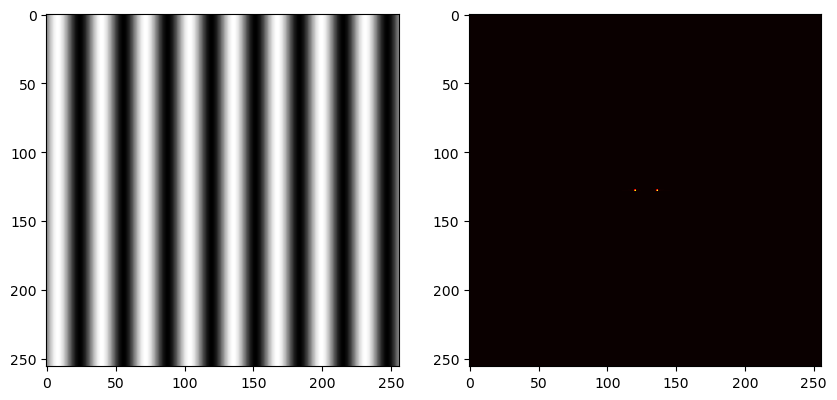

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi
from numpy.fft import fft2, ifft2, fftshift

def sinusoid(N, f, theta=0):  # generate sinusoid, N - no. of pixels, f - frequency, theta - angle of rotation
    x = np.linspace(-1,1,N)
    y = np.linspace(-1,1,N)                # sin(2f*pi x) f determines frequency per unit
    X,Y = np.meshgrid(x,y)
    sinusoid = sin(2*pi*f*(Y*sin(theta) + X*cos(theta)))
    return sinusoid

N = 256
f=4

z = sinusoid(N,f)
z_fft = fftshift(fft2(z))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(z, cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(abs(z_fft), cmap='hot')

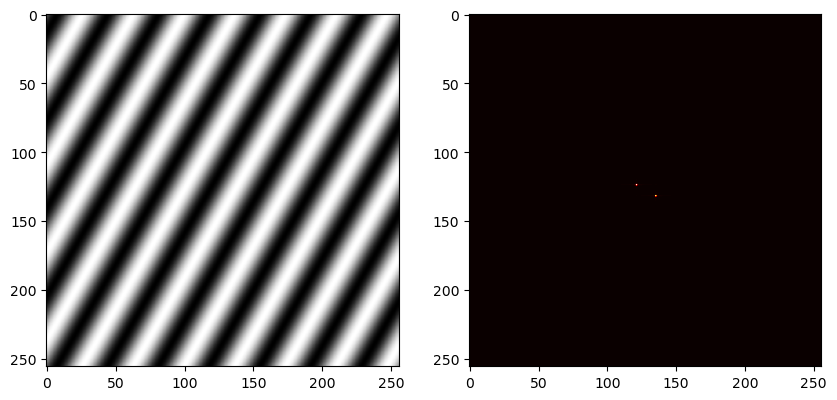

In [2]:
z_rot = sinusoid(N, f, pi/6)
z_rot_fft = fftshift(fft2(z_rot))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(z_rot, cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(abs(z_rot_fft), cmap='hot')

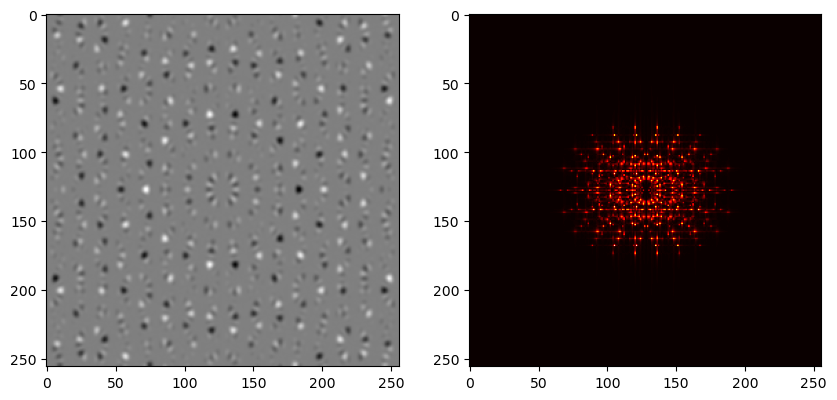

In [3]:
from numpy import linspace

thetas = linspace(0,2*pi, 10)

z = sinusoid(N,f)
for t in thetas:
    z *= sinusoid(N,f,theta=t)

# z = sinusoid(N, f, theta=0)*sinusoid(N,f,theta=pi)*sinusoid(N,f,theta=2*pi)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(z, cmap='gray')

z_rot_fft = fftshift(fft2(z))
ax = fig.add_subplot(122)
plt.imshow(abs(z_rot_fft), cmap='hot')

## Painting by Dr. Daria

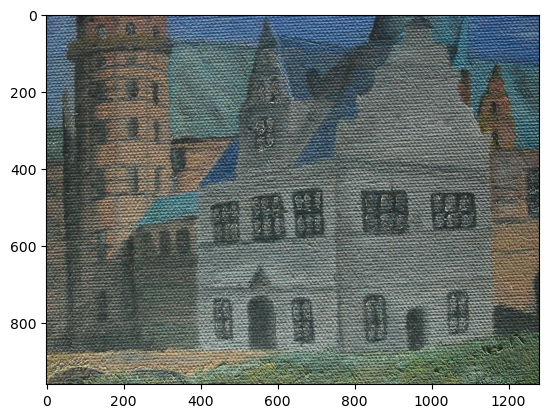

In [4]:
daria = plt.imread('painting.JPG')

plt.imshow(daria)

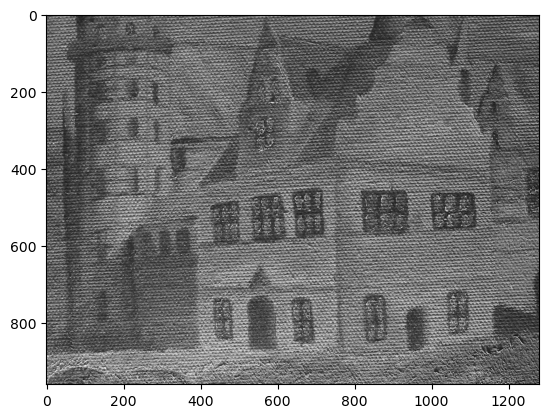

In [5]:
def mean_gray(img):
    grayscale = np.dot(img[...,:3],[0.2989, 0.5870, 0.1140])
    return grayscale

daria_gray = mean_gray(daria)

# daria_gray = daria_gray[:960,:960] # crop image

plt.imshow(daria_gray, cmap='gray')

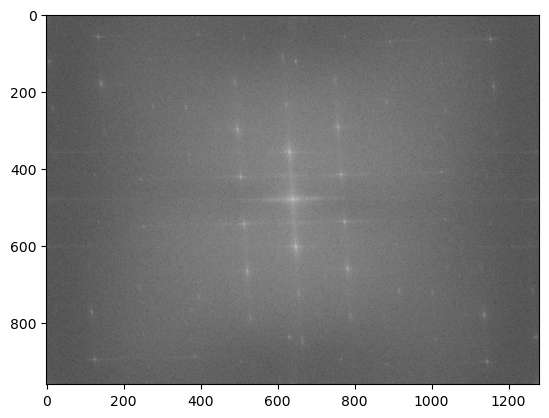

In [6]:
daria_ft = fftshift(fft2(daria_gray))

# plt.axvline(x= 130)
# plt.axhline(y = 65)

plt.imshow(np.log(abs(daria_ft)), cmap='gray')
# plt.imsave('painting_fft.png',np.log(abs(daria_ft)), cmap='gray')

In [7]:
# i tried automating the mask

# def crop(img, x_start, x_stop, y_start, y_stop):
#     img = img[y_start:y_stop, x_start:x_stop]
#     return img

# def maxAtCrop(img):
#     max_local = abs(img).max()
#     x,y = np.where(abs(img) == max_local)
#     return x,y

# daria_crop = crop(daria_ft,400,500,400,500)

# plt.imshow(np.log(abs(daria_crop)), cmap='gray')
# maxAtCrop(daria_crop)

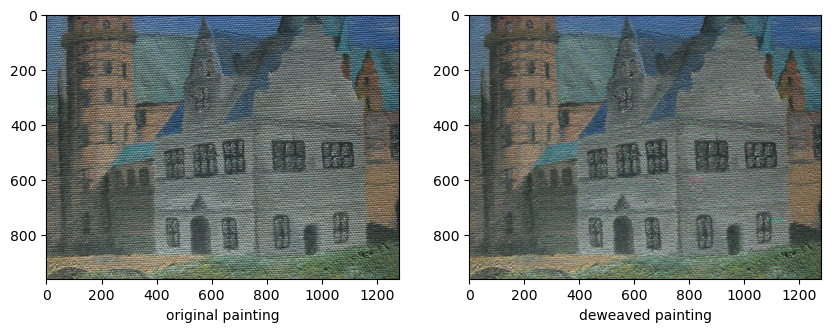

In [8]:
mask = plt.imread('painting_mask3.png')
# thresh = 127
# cond = mask > thresh
mask_bin = mask

mask_ft = fftshift(mask_bin)

daria_red = daria[:,:,0]
# daria_red = daria_red[:960,:960]
daria_red_ft = fft2(daria_red)

daria_green = daria[:,:,1]
# daria_green = daria_green[:960,:960]
daria_green_ft = fft2(daria_green)

daria_blue = daria[:,:,2]
# daria_blue = daria_blue[:960,:960]
daria_blue_ft = fft2(daria_blue)

convolv_red = daria_red_ft*mask_ft[:,:,0]
convolv_green = daria_green_ft*mask_ft[:,:,1]
convolv_blue = daria_blue_ft*mask_ft[:,:,2]

magandang_painting_red = ifft2(convolv_red)
magandang_painting_green = ifft2(convolv_green)
magandang_painting_blue = ifft2(convolv_blue)

magandang_painting = np.dstack((magandang_painting_red,magandang_painting_green,magandang_painting_blue))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.set_xlabel('original painting')
plt.imshow(daria)
ax = fig.add_subplot(122)
ax.set_xlabel('deweaved painting')
plt.imshow(abs(magandang_painting).astype('uint8'))

plt.imsave('painting.png', daria)
plt.imsave('painting-deweaved.png', abs(magandang_painting).astype('uint8'))

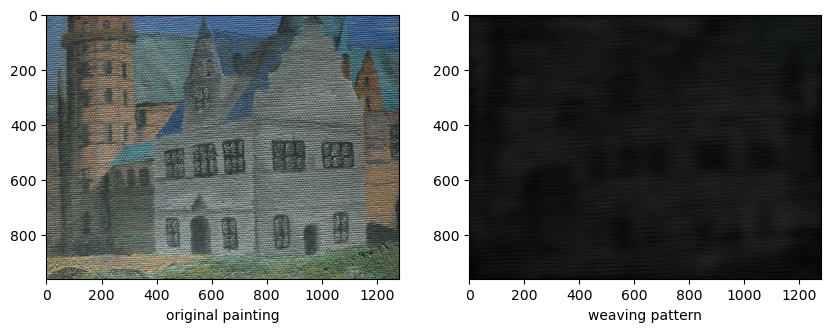

In [9]:
mask_weave = plt.imread('painting_mask_weave.png')
# thresh = 127
# cond = mask >= thresh
# mask_weave = cond*1

mask_weave_ft = fftshift(mask_weave)

convolv_red_w = daria_red_ft*mask_weave_ft[:,:,2]
convolv_green_w = daria_green_ft*mask_weave_ft[:,:,3]
convolv_blue_w = daria_blue_ft*mask_weave_ft[:,:,0]

magandang_weave_red = ifft2(convolv_red_w)
magandang_weave_green = ifft2(convolv_green_w)
magandang_weave_blue = ifft2(convolv_blue_w)

magandang_weave = np.dstack((magandang_weave_red,magandang_weave_green,magandang_weave_blue))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.set_xlabel('original painting')
plt.imshow(daria)
ax = fig.add_subplot(122)
ax.set_xlabel('weaving pattern')
plt.imshow(abs(magandang_weave).astype('uint8'))

plt.imsave('painting-weaving-pattern.png', abs(magandang_weave).astype('uint8'))

## Convolution Theorem Redux

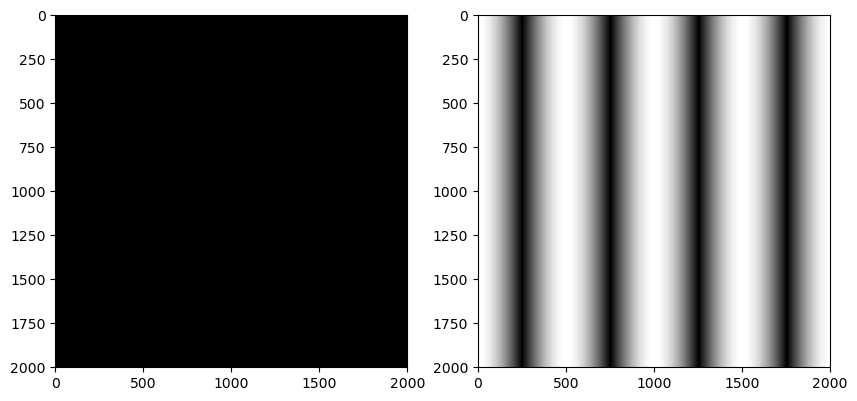

In [10]:
N=2001          # canvas pixels
d=N/1000         # half the distance between the two circles

dots = np.zeros([N,N])
dots[int(N/2),int(N/2-d)] = 1
dots[int(N/2),int(N/2+d)] = 1

dots_ft = fftshift(fft2(dots))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(dots,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(abs(dots_ft), cmap='gray')

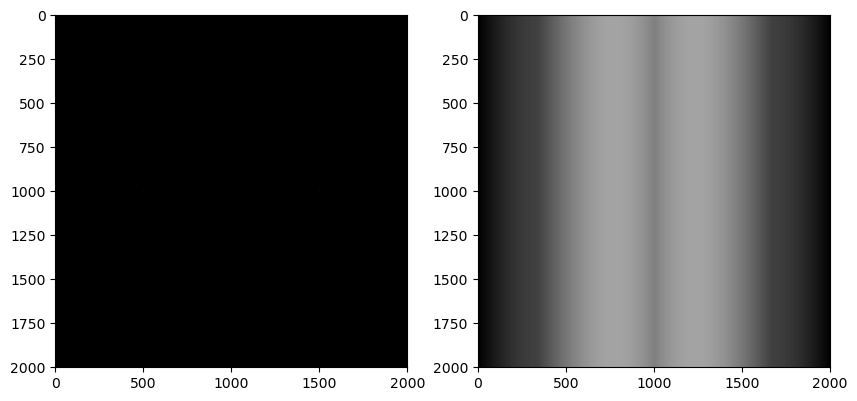

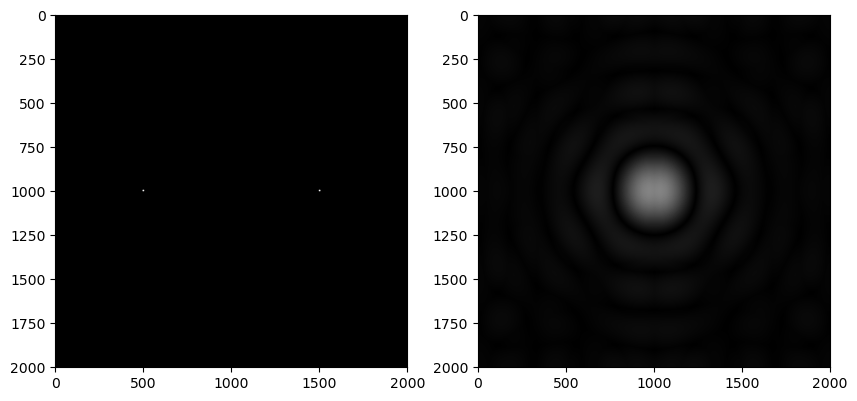

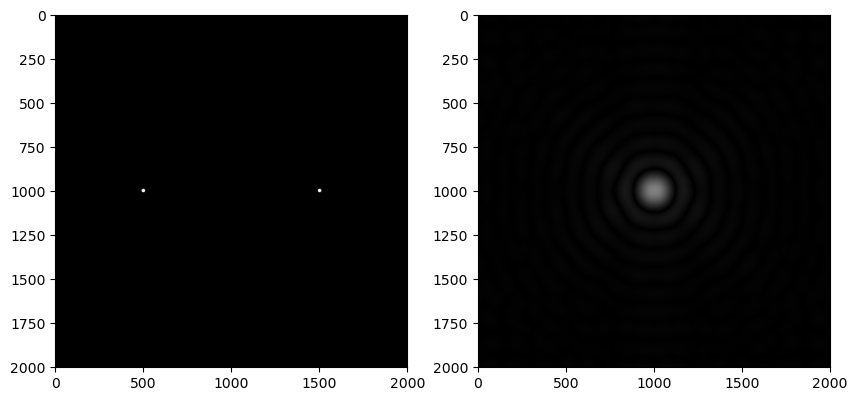

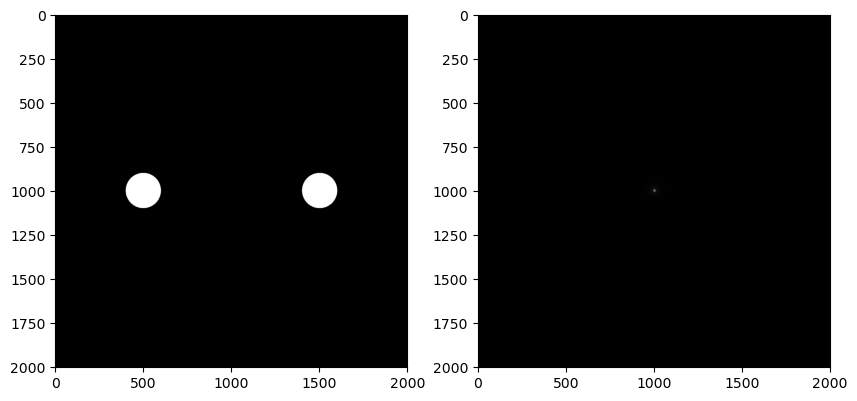

In [11]:
def circle(N, r, c=(0,0)):
    x = np.linspace(-1,1,num = N)
    y = x
    X,Y = np.meshgrid(x,y)
    R = np.sqrt((X-(c[0])/N)**2 + (Y-(c[1])/N)**2)
    A = np.zeros(np.shape(R))
    A[np.where(R<2*r/N)] = 1.0       # set radius of 0.9 to 1 to create a disk
    return A


N = 2001
d = 1000       # distance between the two circles
for radius in [1,5,10,100]:
    A = circle(N, radius, c=(d,0))
    B = circle(N, radius, c=(-d,0))
    circles = A + B

    circles_ft = fftshift(fft2(circles))

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    plt.imshow(circles,cmap='gray')
    ax = fig.add_subplot(122)
    plt.imshow(abs(circles_ft), cmap='gray')

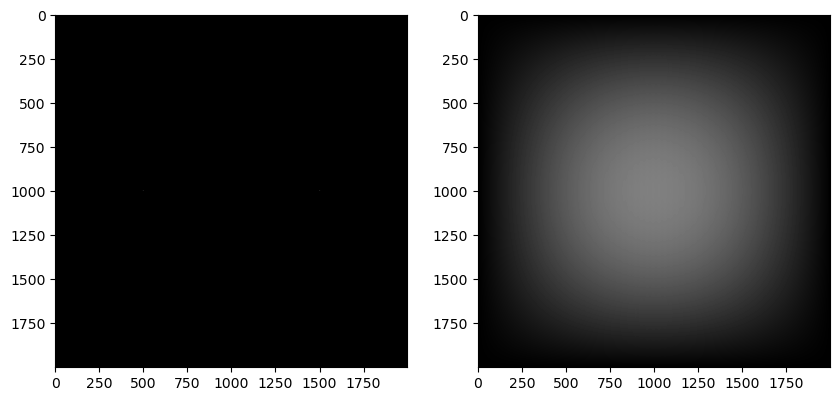

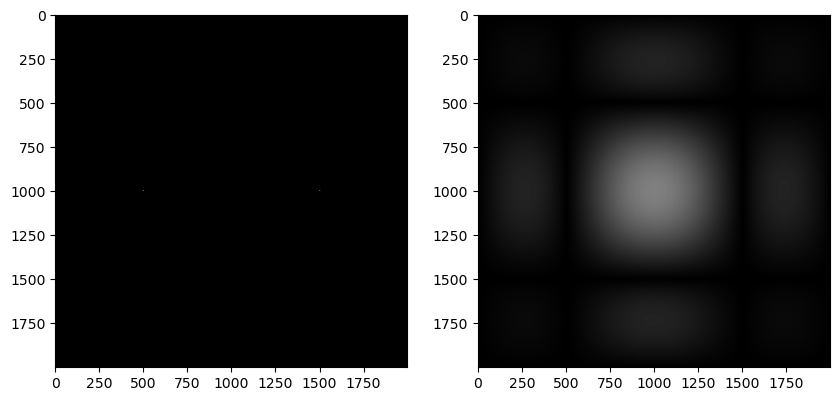

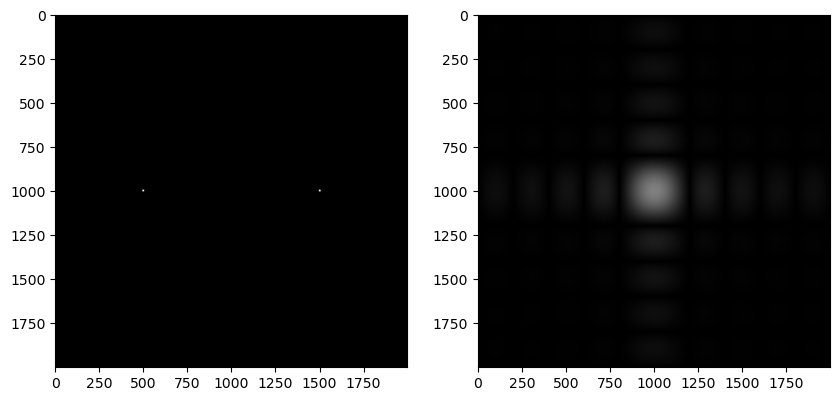

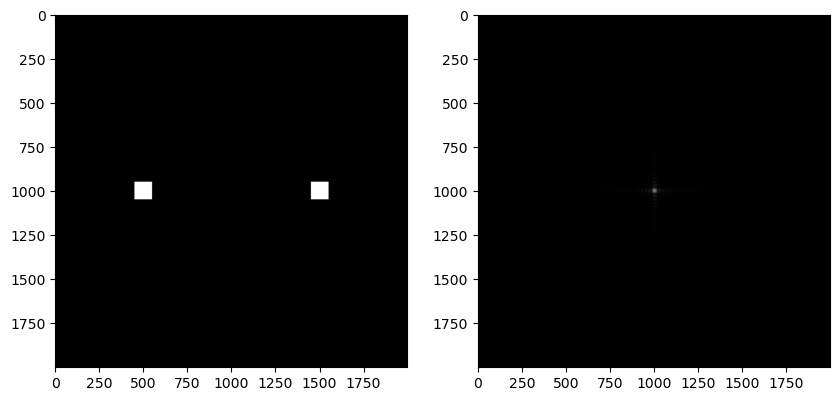

In [12]:
def square(N, s, c=(0,0)):
    A = np.zeros((N,N))
    A[c[0]-int(s/2):c[0]+int(s/2),c[1]-int(s/2):c[1]+int(s/2)] = 1.0
    return A

N = 2000
for side in [2,5,10,100]:
    A = square(N,side,c=(1000,500))
    B = square(N,side,c=(1000,1500))
    squares = A + B

    squares_ft = fftshift(fft2(squares))

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    plt.imshow(squares,cmap='gray')
    ax = fig.add_subplot(122)
    plt.imshow(abs(squares_ft), cmap='gray')

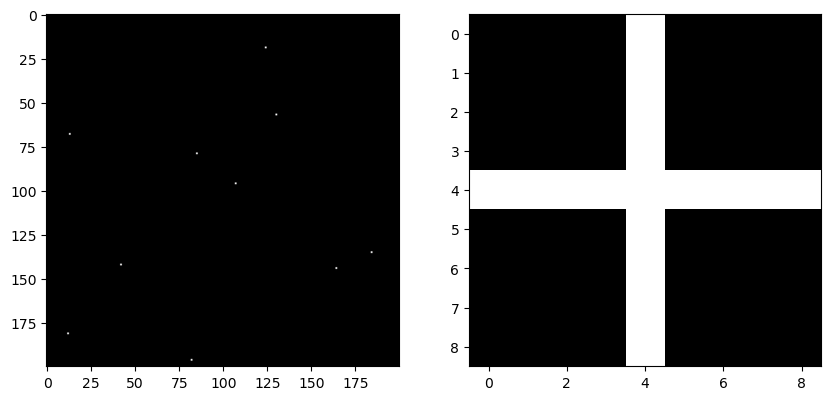

In [88]:
A = np.zeros((200,200))
for i in range(10):
    x = np.random.randint(200)
    y = np.random.randint(200)
    A[x,y] = 1

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(A,cmap='gray')

# d = np.random.choice([0,1], size=(200,200))
d = np.zeros((9,9))
d[4:5, :] = 1
d[:, 4:5] = 1

d_base = d

ax = fig.add_subplot(122)
plt.imshow(d_base, cmap = 'gray')

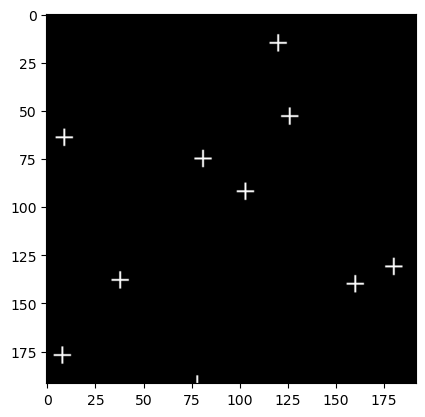

In [89]:
from scipy.signal import convolve2d

A_ft = fftshift(fft2(A))
d_ft = fftshift(fft2(d_base))
conv = convolve2d(A,d_base, mode='valid')
# conv = A*d
plt.imshow(conv,cmap='gray')

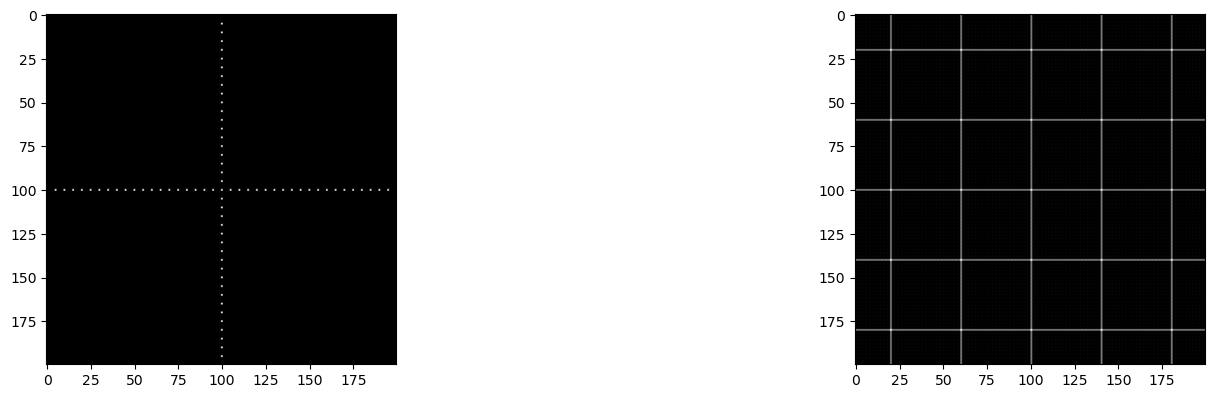

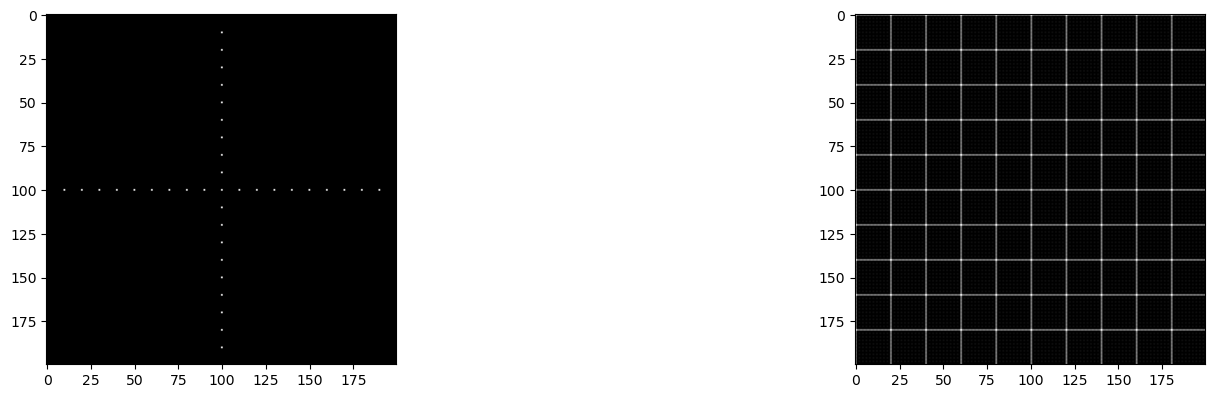

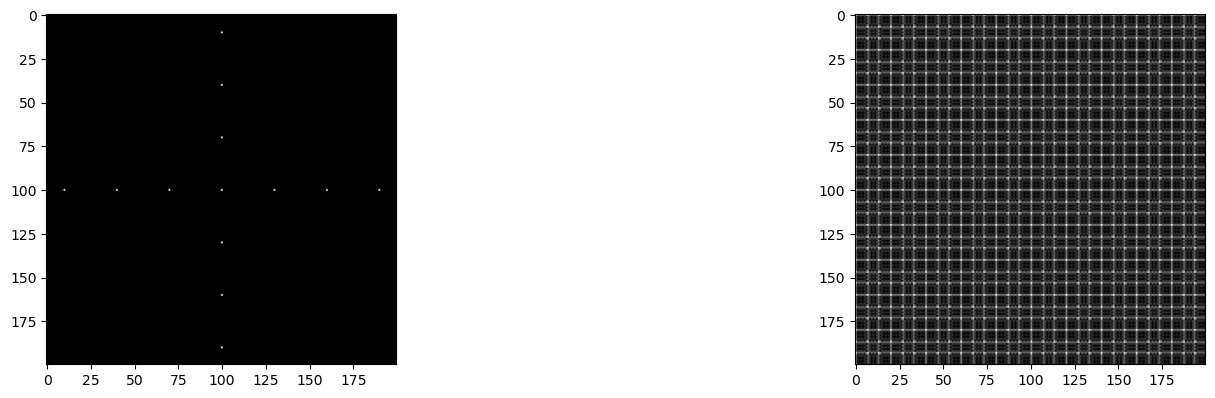

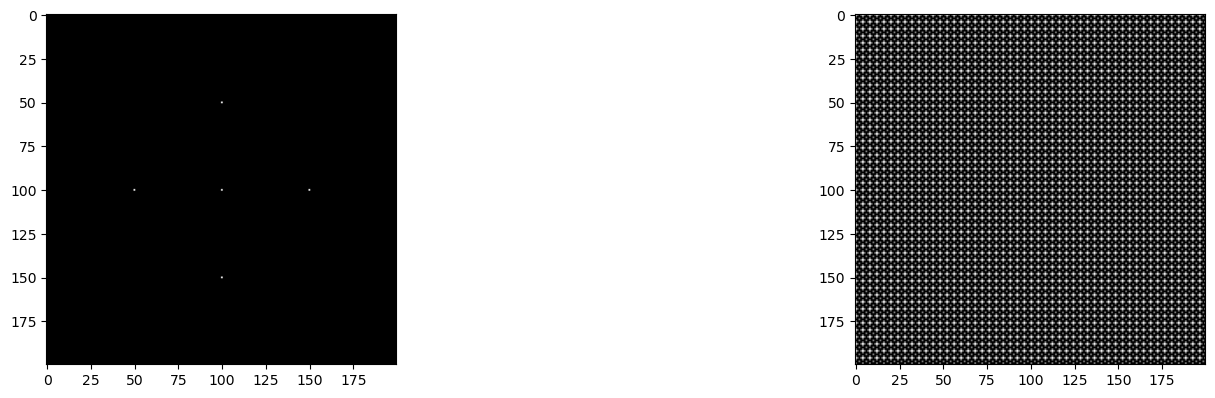

In [104]:
N = 200

spacing = [5,10,30,50]

for space in spacing:
    A = np.zeros((N,N))
    
    center = int(N/2)
    A[int(N/2),int(N/2)] = 1

    # postive x
    place = center
    while place < N:
        A[center,place] = 1
        place += space

    # negative x
    place = center
    while place > 0:
        A[center,place] = 1
        place -= space

    # postive y
    place = center
    while place < N:
        A[place,center] = 1
        place += space

    # negative y
    place = center
    while place > 0:
        A[place,center] = 1
        place -= space
    
    k = 241
    fig = plt.figure(figsize=(40,10))
    ax = fig.add_subplot(k)
    plt.imshow(A, cmap='gray')
    k += 1
    
    h = 245
    A_ft = fftshift(fft2(A))
    ax = fig.add_subplot(k)
    plt.imshow(abs(A_ft), cmap='gray')
    k += 1

## Fingerprint

## Lunar landing

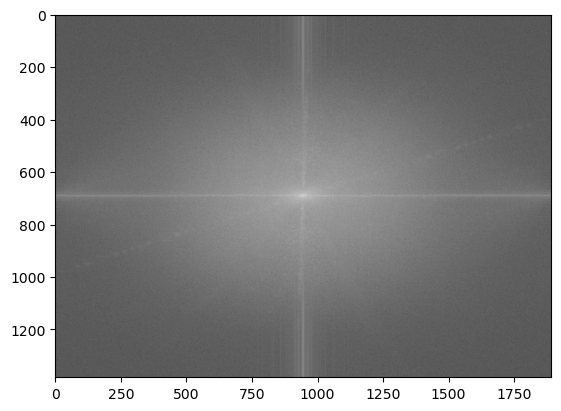

In [15]:
lunar = plt.imread('ApolloLand05.tif')

lunar_ft = fft2(lunar)
lunar_fftshift = fftshift(lunar_ft)

plt.imshow(np.log(abs(lunar_fftshift)), cmap='gray')

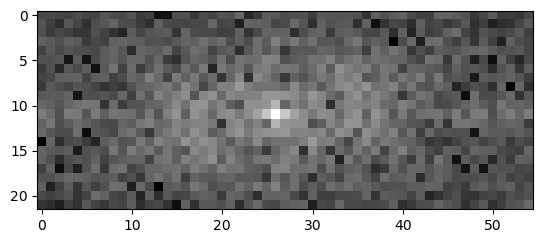

In [16]:
plt.imshow(np.log(abs(lunar_fftshift[680:702,920:975])),cmap='gray')

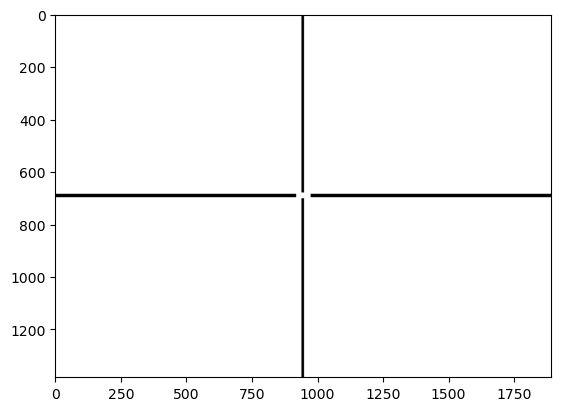

In [17]:
num_mask = np.ones([1383,1892])
num_mask[685:698,:] = 0
# num_mask[:,920:975] = 1
num_mask[:,940:950] = 0
# num_mask[680:702,:] = 1
num_mask[680:702,920:975] = 1

plt.imshow(num_mask, cmap = 'gray')
# plt.imsave('lunar_mask.png',num_mask, cmap = 'gray')

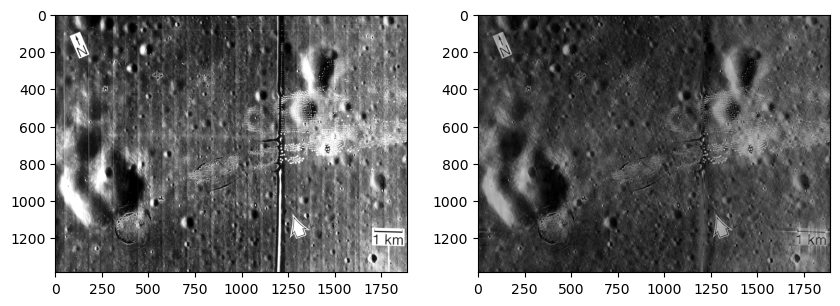

In [18]:
# lunar_mask = plt.imread('lunarmask.png')
# thresh = 127
# cond = lunar_mask > thresh
# lunar_mask_bin = cond*1

lunar_mask_ft = fftshift(num_mask)

lunar_convolv = lunar_ft*lunar_mask_ft

magandang_lunar = ifft2(lunar_convolv)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(lunar, cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(abs(magandang_lunar),cmap='gray')
# plt.imsave('stitched lunar.png',abs(magandang_lunar),cmap='gray')